# Random Environment

This notebook inlcudes the code to generate a random m x n environment in which the agent can be trained. When an environment is generated approximately 30% of the grid will be "holes" with a large negative reward. The aim is for the agent to avoid these holes as much as possible. The start point will always be at the top left corner [(0,0)] and the end point will always be at the bottom right corner [(m-1,n-1)].

The goal throughout training remains the same regardless of the environment. The agent is to find the optimal path from the start point to the ends point. This path should maximise the reward.

This environment can be used with either of the two algorthms which can be seen in the previous two notebooks. It should be noted that for larger environments it is preferable to use Deep Q learning utilising a Q Network over Q learning which uses a Q table. This is due to the fact that the Q table van become very long for larger environments.


## Importing libraries required for this project

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Creating a Class for the Base Environment

A class is created which without the randonmess will generate a base 5x5 environment as seen previously

In [3]:
class environment:
    def __init__(self, n_x = 5, n_y = 5, initial_state = (0,0), loc_positive_reward=(4,4),
                 loc_negative_reward = [(2,2),(2,3),(3,2),(3,3)]):
        self.n_x = n_x
        self.n_y = n_y
        self.num_states = n_x * n_y
        self.initial_state = initial_state
        self.loc_positive_reward = loc_positive_reward
        self.loc_negative_reward = loc_negative_reward
        self.grid = np.zeros((self.n_y, self.n_x))
        self.rewards_field = self.map_rewards()
        
# Assigns a reward value to each state within the grid
    def assign_rewards(self,state):
        if state == self.loc_positive_reward:
            reward = 100
        elif state in self.loc_negative_reward:
            reward = -30
        else:
            reward = -1
        return reward

# Maps the assigned rewards to the grid world
    def map_rewards(self):
        rewards_field = np.zeros_like(self.grid)

        for i in range(self.n_y):
            for j in range(self.n_x):
                rewards_field[i,j] = self.assign_rewards((i,j))
        return rewards_field

    def display_rewards(self):
        print(self.rewards_field)

    def plot_rewards(self):
        plt.imshow(self.rewards_field, cmap="coolwarm", origin="upper")
        plt.colorbar(label="Reward")
        plt.title("GridWorld")
        plt.show()


## Generating the Random Environment

This function creates a random enviroment with approximately 30% of the area being holes. 

The minium length and maximum length of each size of the enviroment can be specifed as inputs to the function.

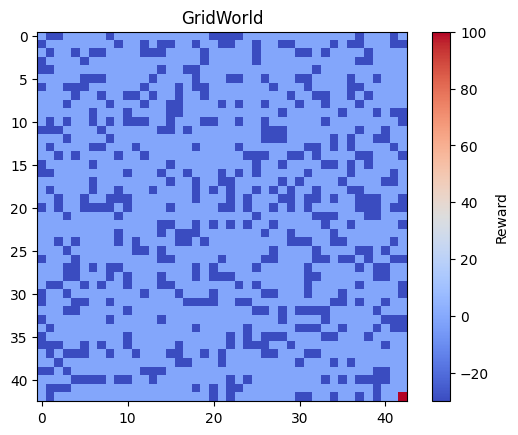

In [12]:
#Creates a random environment grid of size n x m with "holes" in multiple locations
def random_env(min_length,max_length):
    n_x_val = random.randint(min_length,max_length)
    n_y_val = random.randint(min_length,max_length)
    pos_reward_loc = (n_y_val -1 ,n_x_val - 1)
    total_area = n_y_val * n_x_val
    no_of_holes = round(0.3*total_area)
    neg_reward_loc = []
    ini_state = (0,0)
    for i in range(no_of_holes):
        add_hole = (random.randint(0,n_x_val-1),random.randint(0,n_y_val-1))
        if add_hole != pos_reward_loc:
            neg_reward_loc.append(add_hole)
        no_of_holes += 1
    return n_x_val, n_y_val, ini_state, pos_reward_loc, neg_reward_loc



x = random_env(40,50)
env = environment(*x)

env.plot_rewards()